In [ ]:
# ! pip install condacolab
# import condacolab
# condacolab.install()

In [ ]:
# ! rm -rf /usr/local/conda-meta/pinned
# ! mamba install pygmt numba pyproj
# ! pip install --upgrade verde ensaio boule harmonica cffi==1.16.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import verde as vd
import harmonica as hm
import boule as bl
import ensaio
import pygmt
import pyproj

## Carrega os dados grav

In [2]:
# path_gravity = ensaio.fetch_southern_africa_gravity(version=1)
path_topography = ensaio.fetch_earth_topography(version=1)
path_geoid  = ensaio.fetch_earth_geoid(version=1)

In [64]:
data = pd.read_csv("gravity_table_CISA_BNDG.csv", delimiter=',')
data


,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996
2,3,2246.38,16:06:00,2019/12/03,117.3,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996
3,4,2245.71,16:46:00,2019/12/03,129.1,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996
...,...,...,...,...,...,...,...,...,...,...,...,...
3318,na,NaN,NaN,NaN,764.96,NaN,NaN,-42.938100,-18.776100,978305.480000,NaN,UFOP
3319,na,NaN,NaN,NaN,712.64,NaN,NaN,-42.798300,-18.786900,978319.790000,NaN,UFOP
3320,na,NaN,NaN,NaN,804.99,NaN,NaN,-42.853100,-18.773100,978300.120000,NaN,UFOP
3321,na,NaN,NaN,NaN,766.77,NaN,NaN,-42.975600,-18.778300,978306.040000,NaN,UFOP


In [65]:
topography = xr.load_dataarray(path_topography)
geoid = xr.load_dataarray(path_geoid)



In [66]:
# West, East, South, North (degrees)
region = (-44, -40, -21, -19)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=0)

In [67]:
data = data[vd.inside((data.longitude, data.latitude), region)]
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996
2,3,2246.38,16:06:00,2019/12/03,117.3,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996
3,4,2245.71,16:46:00,2019/12/03,129.1,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996
...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,NaN,UFOP
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,NaN,UFOP
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,NaN,UFOP
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,NaN,UFOP


In [68]:
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography

topography_1 = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
topography_1 = topography_1.rename({'lon': 'longitude', 'lat': 'latitude'})
topography_1

<xarray.DataArray 'elevation' (latitude: 480, longitude: 960)>
array([[ 1056. ,  1032. ,  1036. , ..., -1350.5, -1363.5, -1381.5],
       [ 1019. ,  1019. ,  1037. , ..., -1352. , -1360.5, -1373. ],
       [ 1003. ,  1011. ,  1037. , ..., -1350.5, -1356.5, -1364.5],
       ...,
       [  641. ,   668. ,   683. , ...,    62. ,    62. ,    59. ],
       [  668. ,   661. ,   667. , ...,    60. ,    63. ,    65. ],
       [  672. ,   653. ,   640. , ...,    65. ,    62. ,    63. ]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -44.0 -43.99 -43.99 ... -40.01 -40.01 -40.0
  * latitude   (latitude) float64 -21.0 -20.99 -20.99 ... -19.01 -19.01 -19.0
Attributes:
    long_name:         Earth elevation relative to the geoid
    cpt:               geo
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [70]:
interpolator = vd.KNeighbors()

geoid_table = vd.grid_to_table(geoid)
geoid_1 = vd.grid_to_table(topography_1)


interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
geoid_1 = geoid_1.assign(elevation=interpolator.predict((geoid_1.longitude, geoid_1.latitude)))

geoid_values = np.reshape(geoid_1.elevation, topography_1.shape)
geoid_1 = xr.DataArray(geoid_values, coords=[topography_1.latitude, topography_1.longitude], dims=['latitude', 'longitude'])
geoid_1

<xarray.DataArray (latitude: 480, longitude: 960)>
array([[-3. , -3. , -3. , ..., -7.4, -7.4, -7.4],
       [-3. , -3. , -3. , ..., -7.4, -7.4, -7.4],
       [-3. , -3. , -3. , ..., -7.4, -7.4, -7.4],
       ...,
       [-8.8, -8.8, -8.8, ..., -7.4, -7.4, -7.4],
       [-8.8, -8.8, -8.8, ..., -7.4, -7.4, -7.4],
       [-8.8, -8.8, -8.8, ..., -7.4, -7.4, -7.4]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -21.0 -20.99 -20.99 ... -19.01 -19.01 -19.0
  * longitude  (longitude) float64 -44.0 -43.99 -43.99 ... -40.01 -40.01 -40.0

/tmp/ipykernel_45307/4137423634.py:3: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


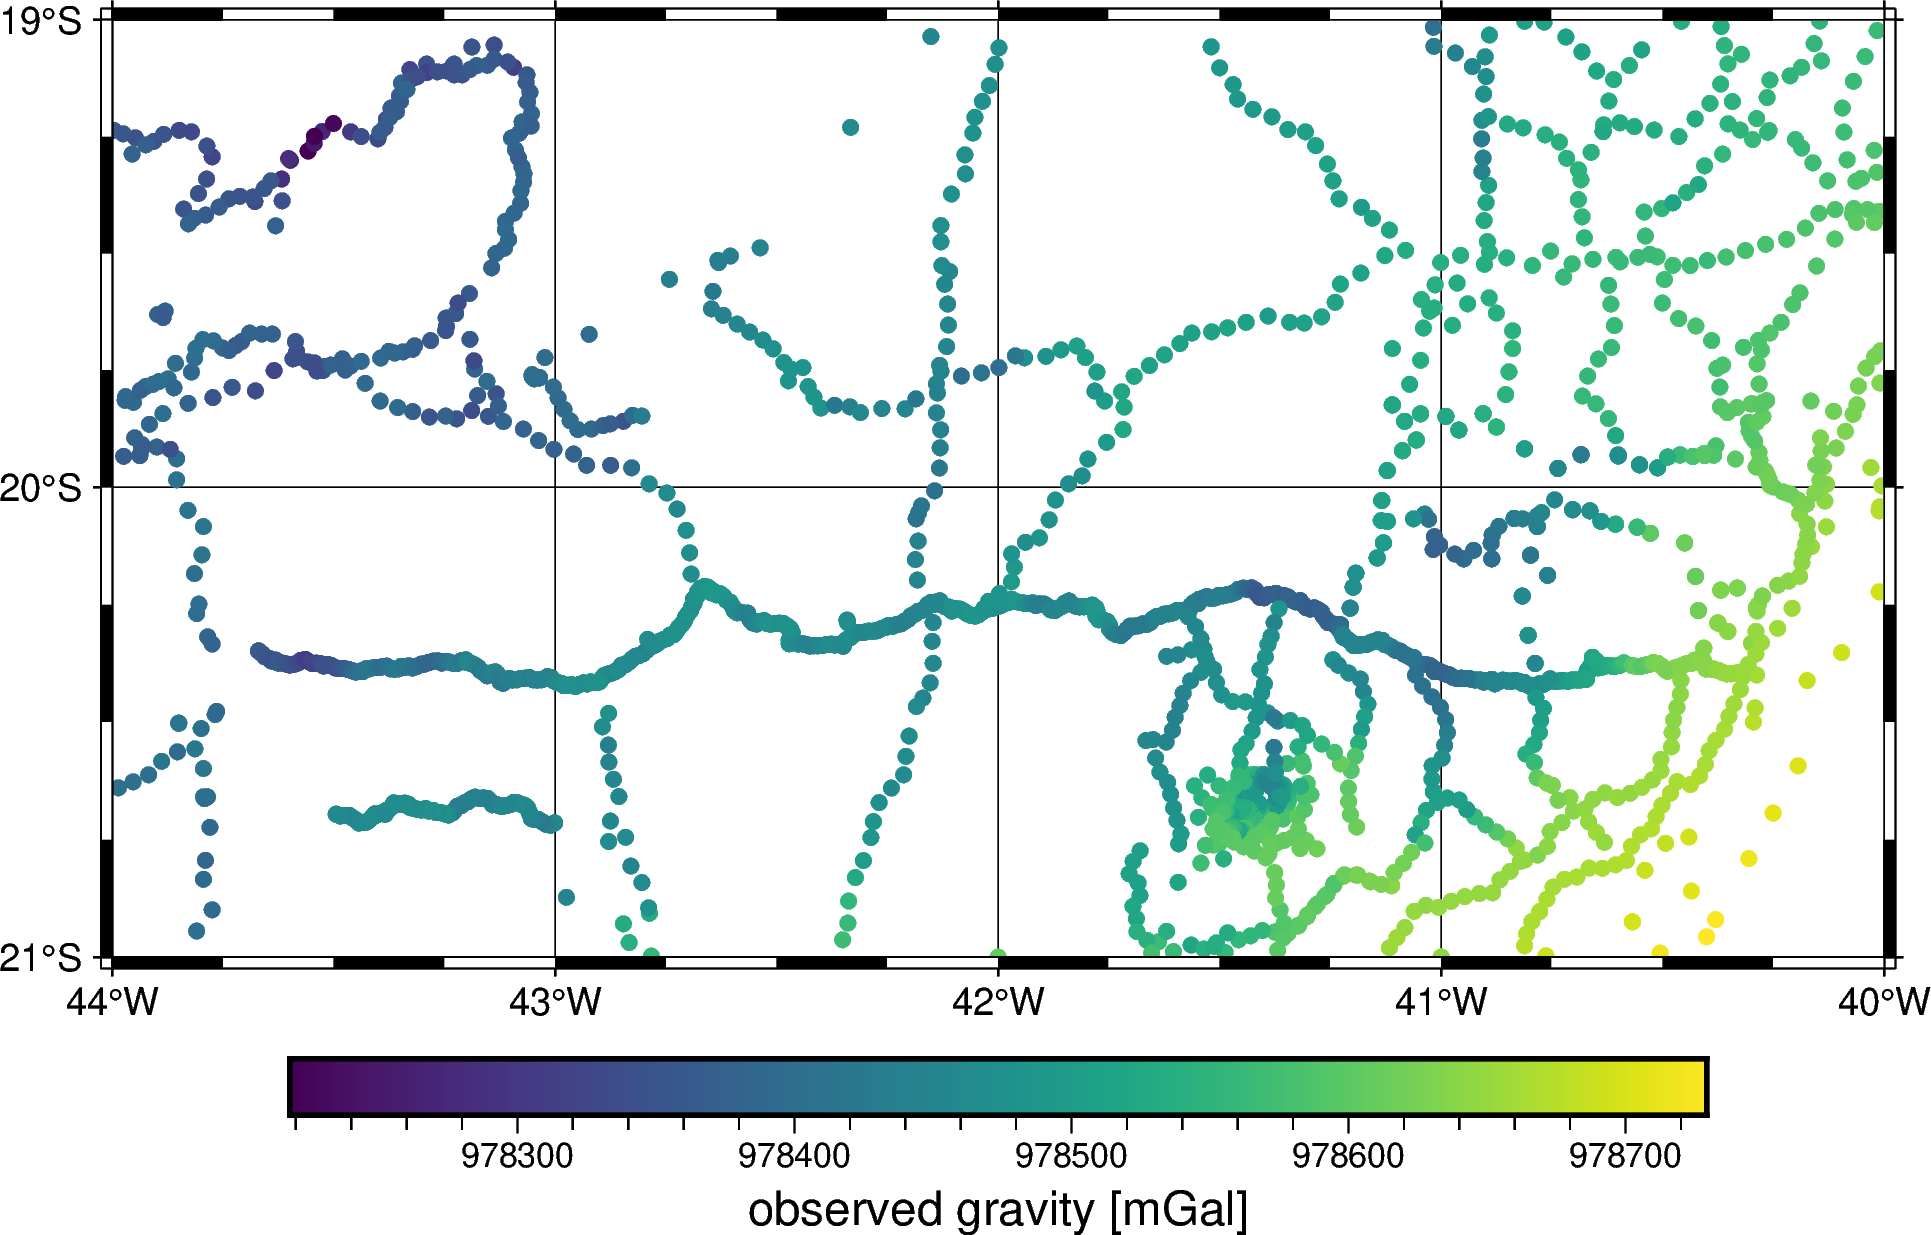

In [71]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show(width=600)

/tmp/ipykernel_45307/1642169547.py:5: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


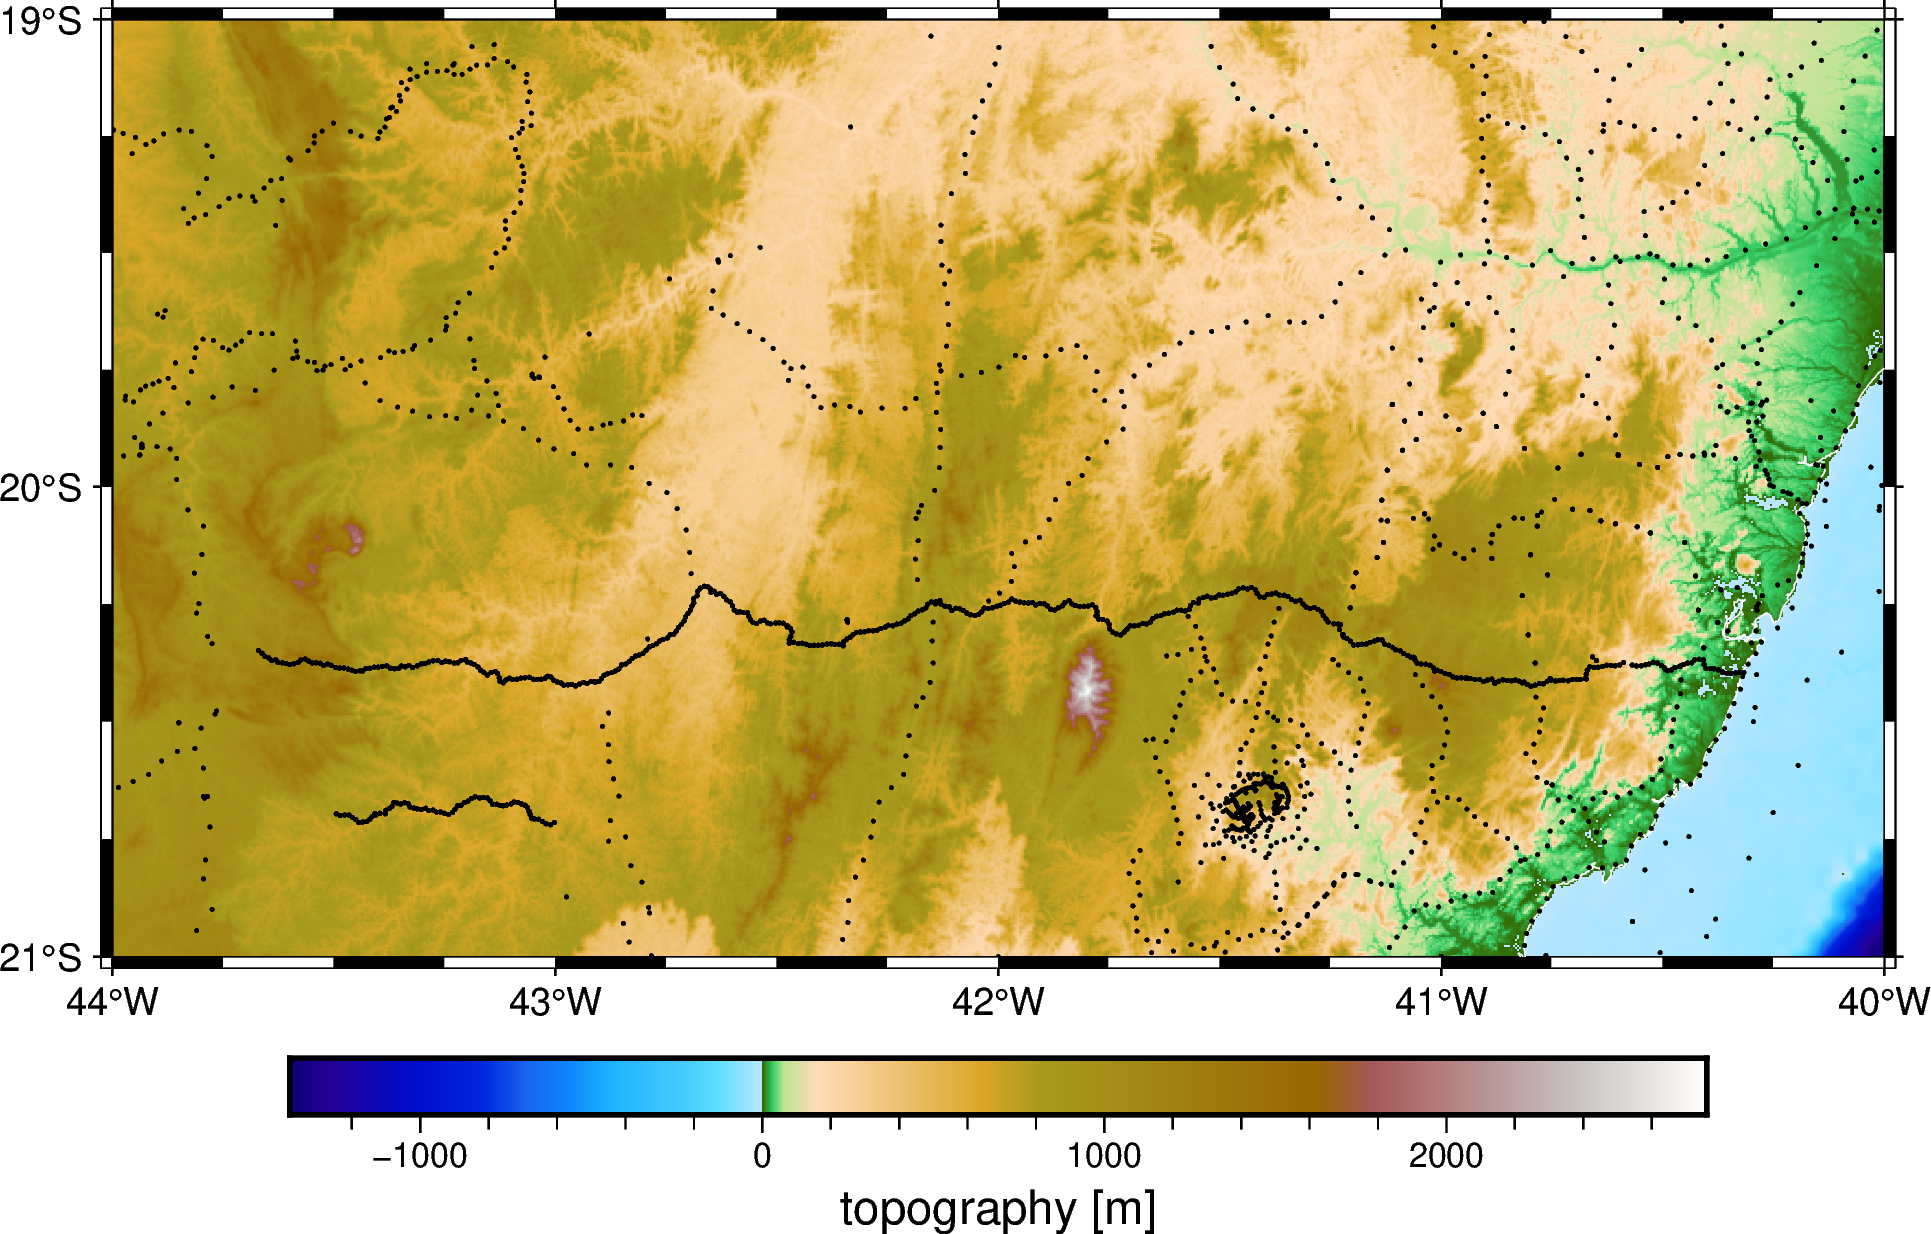

In [73]:
fig = pygmt.Figure()
fig.grdimage(topography_1, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.04c",
    color="black",
)
fig.show(width=600)

## Converte altitudes ortométricas para geométricas

In [76]:
topography_geometric = topography_1 + geoid_1
topography_geometric

<xarray.DataArray (latitude: 480, longitude: 960)>
array([[ 1053. ,  1029. ,  1033. , ..., -1357.9, -1370.9, -1388.9],
       [ 1016. ,  1016. ,  1034. , ..., -1359.4, -1367.9, -1380.4],
       [ 1000. ,  1008. ,  1034. , ..., -1357.9, -1363.9, -1371.9],
       ...,
       [  632.2,   659.2,   674.2, ...,    54.6,    54.6,    51.6],
       [  659.2,   652.2,   658.2, ...,    52.6,    55.6,    57.6],
       [  663.2,   644.2,   631.2, ...,    57.6,    54.6,    55.6]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -44.0 -43.99 -43.99 ... -40.01 -40.01 -40.0
  * latitude   (latitude) float64 -21.0 -20.99 -20.99 ... -19.01 -19.01 -19.0

In [82]:
geoid_table = vd.grid_to_table(geoid)
interpolator = vd.KNeighbors()
geoid_table.values.min()
interpolator.fit((geoid_table.longitude, geoid_table.latitude), geoid_table.geoid)
data = data.assign(geoid_m=interpolator.predict((data.longitude, data.latitude)))
# data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)

# data['height_sea_level_m'] = pd.to_numeric(data['height_sea_level_m'], errors='coerce')
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)



data = data.dropna(subset=['height_sea_level_m'])


has_nan = data.height_sea_level_m.isnull().any()
print(has_nan)

data

False


,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.800000,142.140000
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.800000,146.260000
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.600000,111.700000
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.800000,123.300000
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.800000,124.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,NaN,UFOP,-9.000000,555.530000
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,NaN,UFOP,-9.000000,552.500000
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,NaN,UFOP,-10.400001,570.819999
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,NaN,UFOP,-9.000000,520.920000


## Distúrbio da gravidade

In [83]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.height_geometric_m)
)
data = data.assign(gravity_disturbance_mgal=data.gravity_mgal - data.normal_gravity_mgal)
data

/home/gelson/anaconda3/envs/fatiando/lib/python3.10/site-packages/boule/_ellipsoid.py:555: UserWarning: Formulas used are valid for points outside the ellipsoid.Height must be greater than or equal to zero.
  warn(


,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.800000,142.140000,978637.817634,-46.411029
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.800000,146.260000,978636.372087,-44.926310
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.600000,111.700000,978646.141191,-47.667672
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.800000,123.300000,978643.260610,-45.450731
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.800000,124.210000,978643.593922,-41.848287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,NaN,UFOP,-9.000000,555.530000,978457.167166,-57.637166
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,NaN,UFOP,-9.000000,552.500000,978455.303743,-62.493743
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,NaN,UFOP,-10.400001,570.819999,978416.571994,-46.761994
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,NaN,UFOP,-9.000000,520.920000,978462.493467,-64.273467


/tmp/ipykernel_45307/2682708163.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


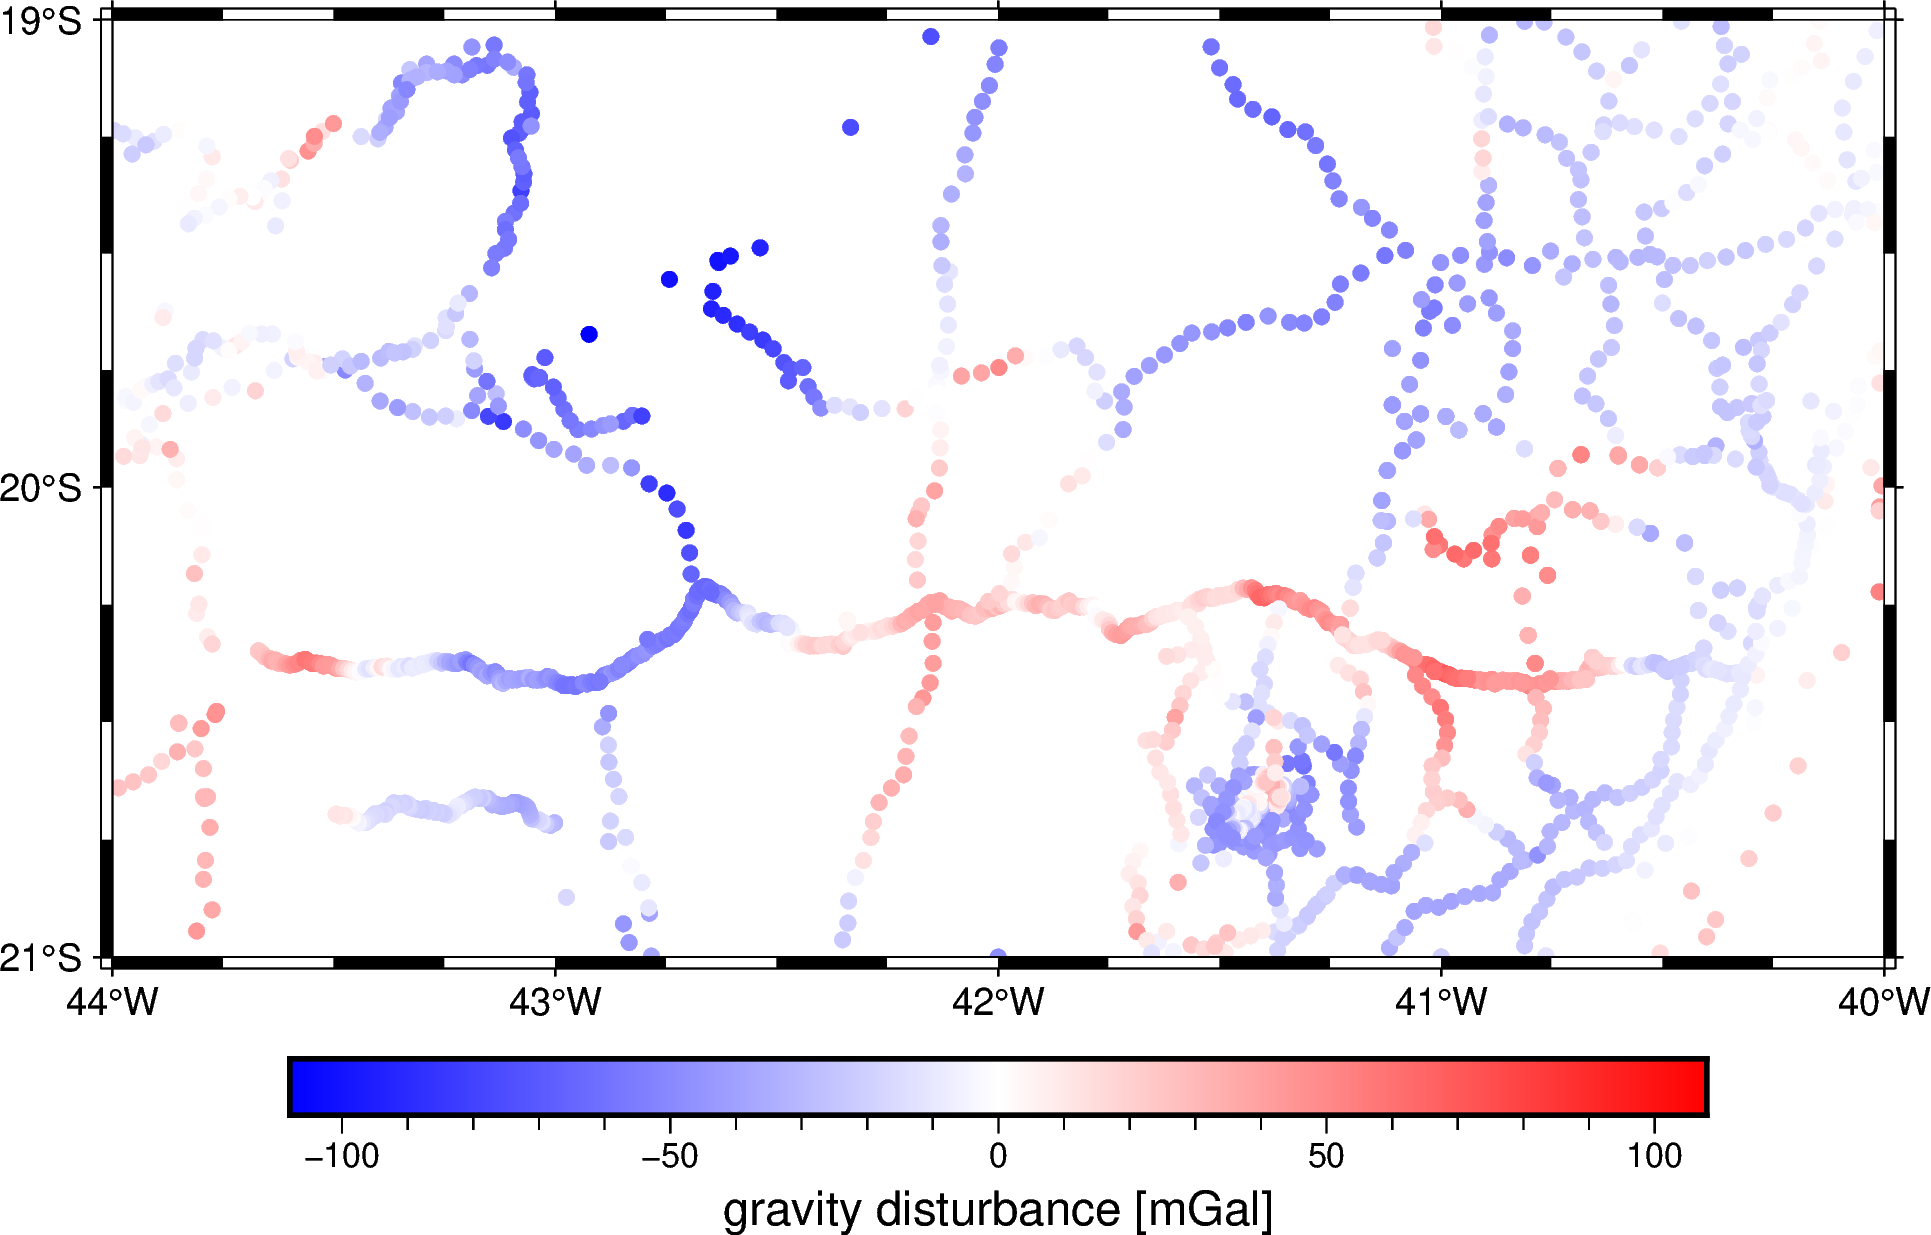

In [84]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show(width=600)

## Correção topográfica

![](https://www.fatiando.org/tutorials/_images/topographic-correction.svg)

In [85]:
projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())

# projection = pyproj.Proj(proj='utm', ellps='WGS84', zone=24, south=True)

In [86]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.800000,142.140000,978637.817634,-46.411029,-4.337893e+06,-2.204371e+06
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.800000,146.260000,978636.372087,-44.926310,-4.336557e+06,-2.204048e+06
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.600000,111.700000,978646.141191,-47.667672,-4.334883e+06,-2.202376e+06
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.800000,123.300000,978643.260610,-45.450731,-4.333043e+06,-2.203678e+06
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.800000,124.210000,978643.593922,-41.848287,-4.330792e+06,-2.204819e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,NaN,UFOP,-9.000000,555.530000,978457.167166,-57.637166,-4.489656e+06,-2.104324e+06
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,NaN,UFOP,-9.000000,552.500000,978455.303743,-62.493743,-4.492498e+06,-2.098958e+06
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,NaN,UFOP,-10.400001,570.819999,978416.571994,-46.761994,-4.498883e+06,-2.034797e+06
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,NaN,UFOP,-9.000000,520.920000,978462.493467,-64.273467,-4.497023e+06,-2.094045e+06


In [87]:
topography_proj = vd.project_grid(topography_geometric, projection, method="nearest")
topography_proj

/home/gelson/anaconda3/envs/fatiando/lib/python3.10/site-packages/verde/blockreduce.py:177: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  columns = {"data{}".format(i): comp.ravel() for i, comp in enumerate(data)}
/home/gelson/anaconda3/envs/fatiando/lib/python3.10/site-packages/verde/blockreduce.py:179: FutureWarning: The provided callable <function mean at 0x7f50e449f520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  blocked = pd.DataFrame(columns).groupby("block").aggregate(reduction)
/home/gelson/anaconda3/envs/fatiando/lib/python3.10/site-packages/verde/blockreduce.py:236: FutureWarning: The provided callable <function mean at 0x7f50e449f520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callab

<xarray.DataArray 'scalars' (northing: 480, easting: 960)>
array([[ 1053.  ,  1031.  ,  1031.  , ..., -1357.9 , -1370.9 , -1388.9 ],
       [ 1016.  ,  1025.  ,  1025.  , ..., -1359.4 , -1367.9 , -1380.4 ],
       [ 1000.  ,  1021.  ,  1021.  , ..., -1357.9 , -1363.9 , -1371.9 ],
       ...,
       [  632.2 ,   666.7 ,   666.7 , ...,    54.6 ,    54.6 ,    51.6 ],
       [  661.2 ,   646.45,   646.45, ...,    55.1 ,    55.1 ,    56.6 ],
       [     nan,      nan,      nan, ...,    55.1 ,    55.1 ,    56.6 ]],
      dtype=float32)
Coordinates:
  * easting   (easting) float64 -4.597e+06 -4.597e+06 ... -4.18e+06 -4.18e+06
  * northing  (northing) float64 -2.231e+06 -2.23e+06 ... -2.01e+06 -2.01e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

In [88]:
topography_density = np.where(topography_proj > 0, 2670, 1040 - 2670)
topography_model = hm.prism_layer(
    coordinates=(topography_proj.easting, topography_proj.northing),
    surface=topography_proj,
    reference=0,
    properties={"density": topography_density}
)
topography_model

<xarray.Dataset>
Dimensions:   (northing: 480, easting: 960)
Coordinates:
  * easting   (easting) float64 -4.597e+06 -4.597e+06 ... -4.18e+06 -4.18e+06
  * northing  (northing) float64 -2.231e+06 -2.23e+06 ... -2.01e+06 -2.01e+06
    top       (northing, easting) float32 1.053e+03 1.031e+03 ... 55.1 56.6
    bottom    (northing, easting) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    density   (northing, easting) int64 2670 2670 2670 2670 ... 2670 2670 2670
Attributes:
    coords_units:      meters
    properties_units:  SI

grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain


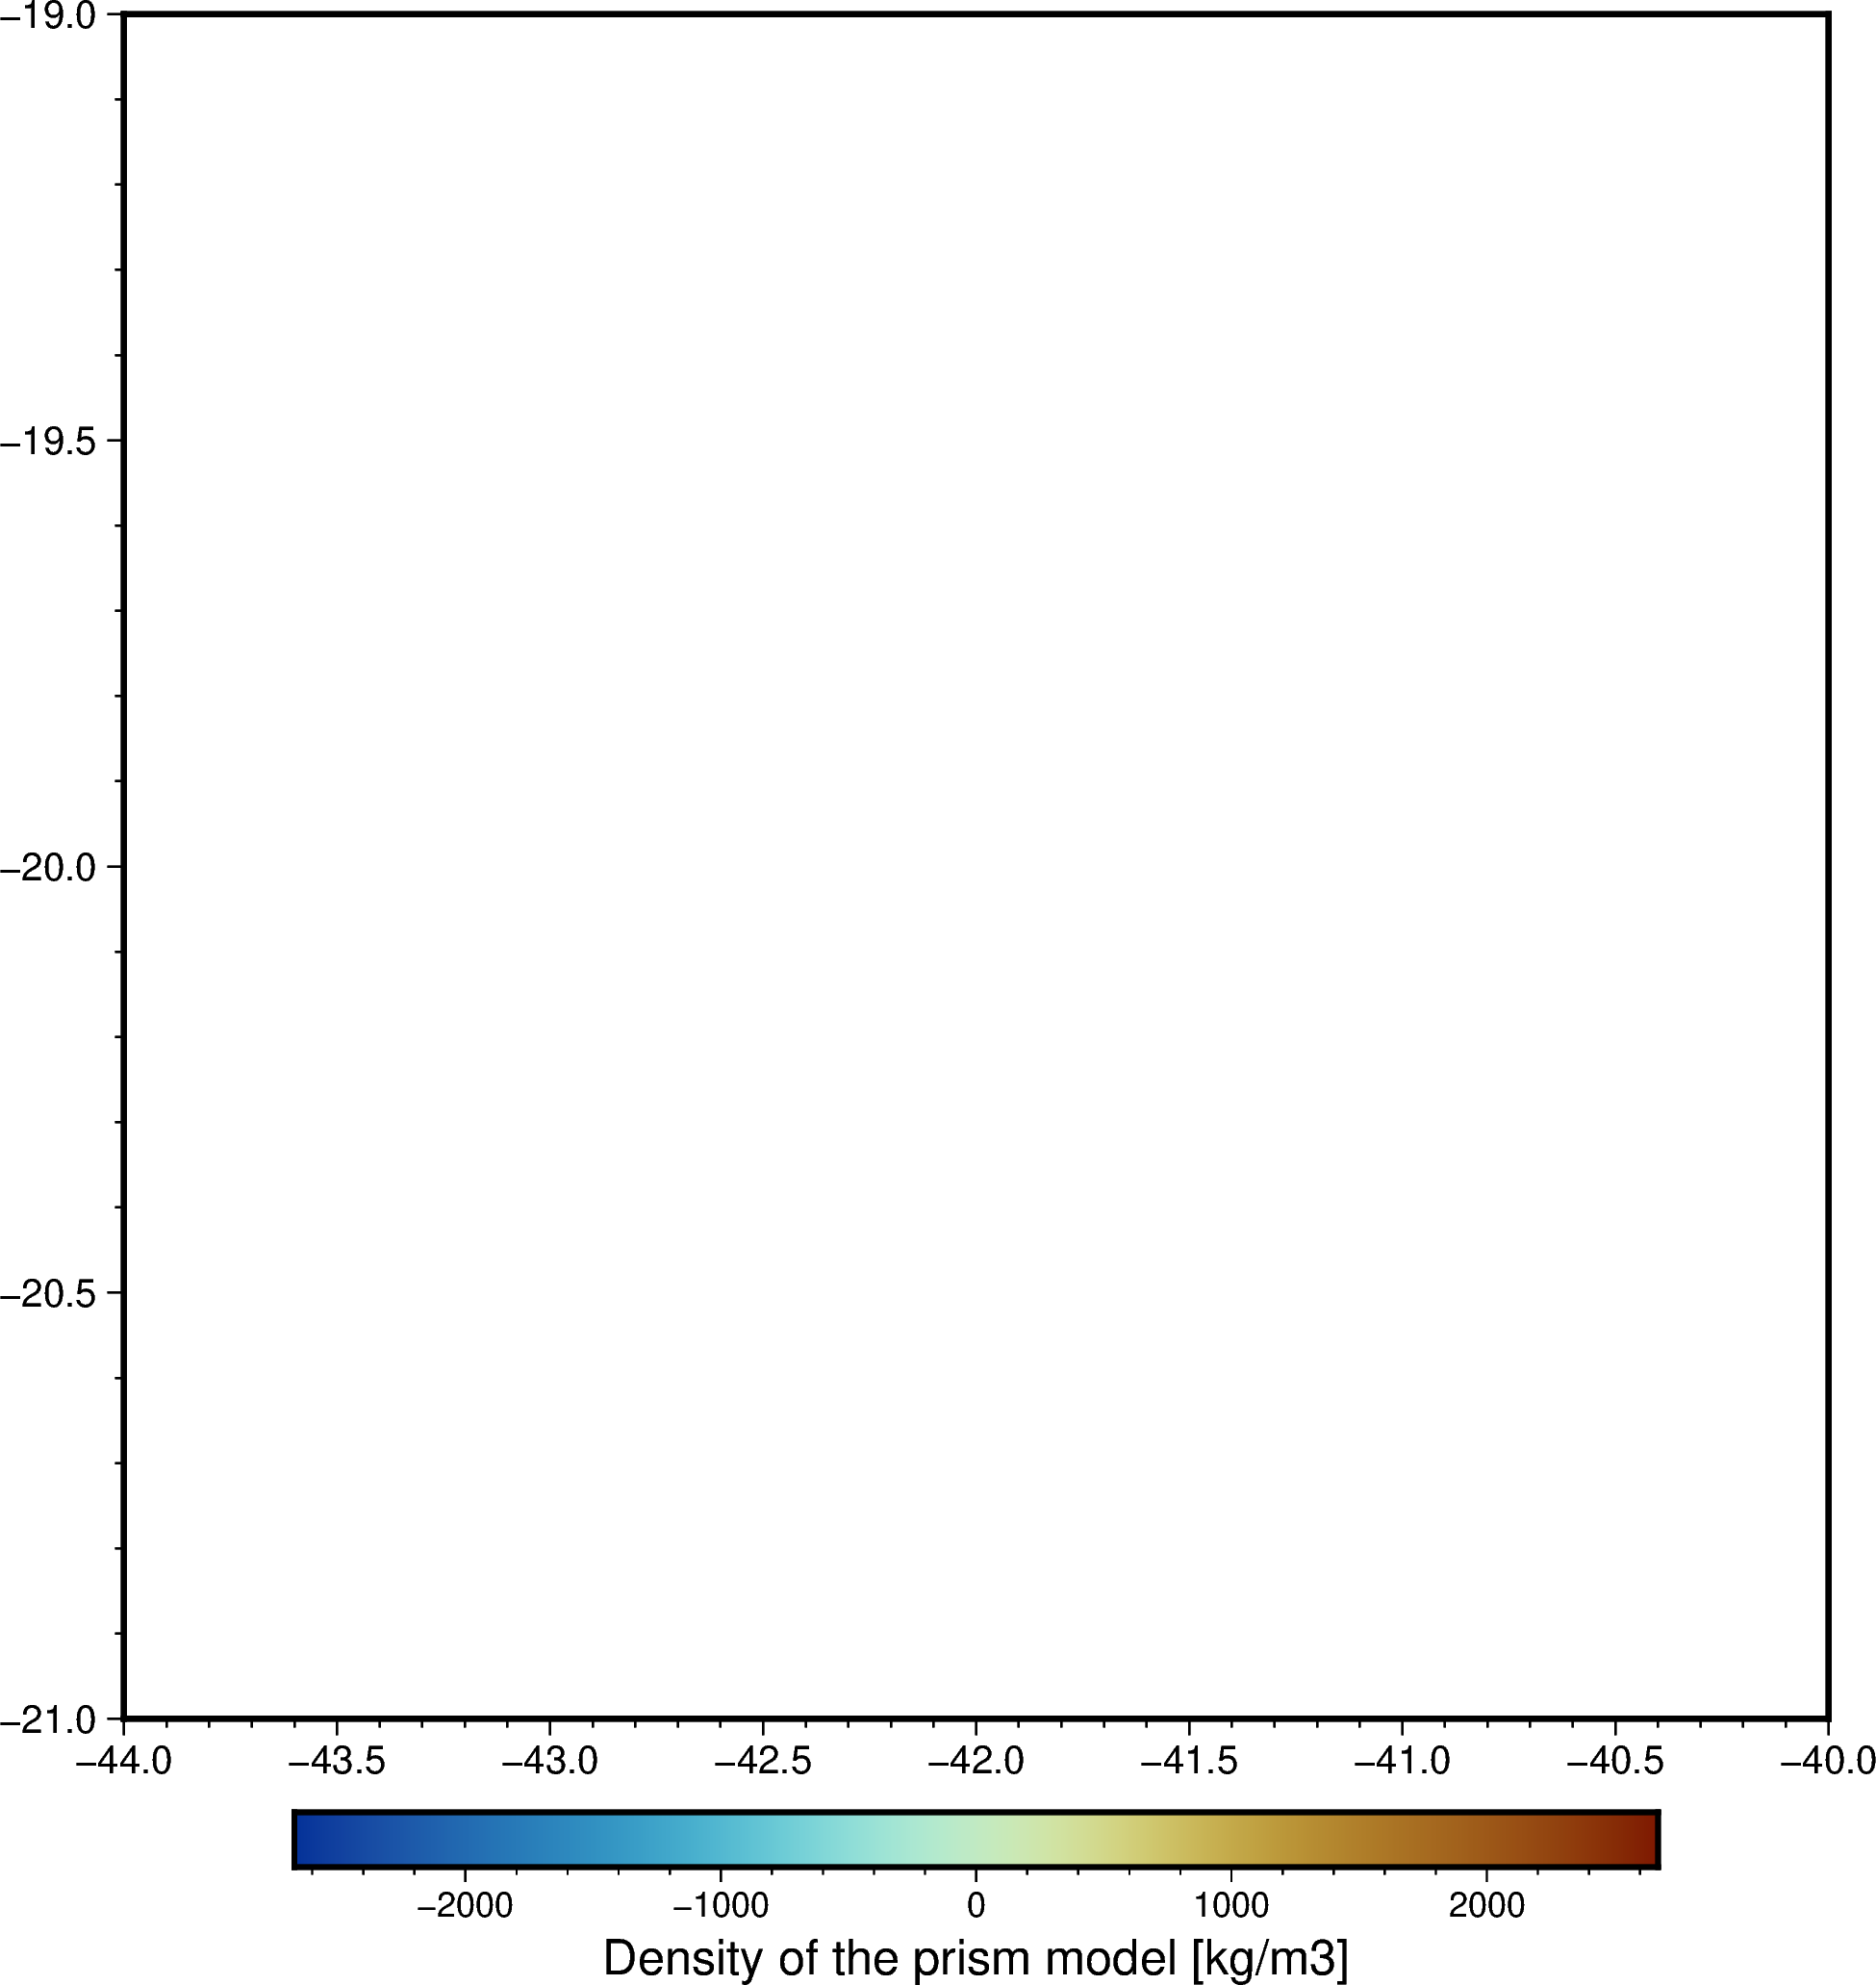

In [89]:
fig = pygmt.Figure()
scale = vd.maxabs(topography_model.density)
pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
fig.grdimage(topography_model.density, projection="X15c", frame=True)
fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
fig.show()

In [90]:
coordinates = (data.easting_m, data.northing_m, data.height_geometric_m)
terrain_effect = topography_model.prism_layer.gravity(coordinates, field="g_z")

In [91]:
data = data.assign(
    gravity_bouguer_mgal=data.gravity_disturbance_mgal - terrain_effect
)

data = data.dropna(subset=['gravity_bouguer_mgal'])
data

,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,TideCorr,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m,gravity_bouguer_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,0.053423,03122019_996,-5.800000,142.140000,978637.817634,-46.411029,-4.337893e+06,-2.204371e+06,-52.725722
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,0.066119,03122019_996,-5.800000,146.260000,978636.372087,-44.926310,-4.336557e+06,-2.204048e+06,-48.682833
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,0.077715,03122019_996,-5.600000,111.700000,978646.141191,-47.667672,-4.334883e+06,-2.202376e+06,-56.054468
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,0.081974,03122019_996,-5.800000,123.300000,978643.260610,-45.450731,-4.333043e+06,-2.203678e+06,-50.389693
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,0.082319,03122019_996,-5.800000,124.210000,978643.593922,-41.848287,-4.330792e+06,-2.204819e+06,-50.678791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,NaN,UFOP,-9.000000,555.530000,978457.167166,-57.637166,-4.489656e+06,-2.104324e+06,-116.114361
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,NaN,UFOP,-9.000000,552.500000,978455.303743,-62.493743,-4.492498e+06,-2.098958e+06,-121.307053
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,NaN,UFOP,-10.400001,570.819999,978416.571994,-46.761994,-4.498883e+06,-2.034797e+06,-109.585859
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,NaN,UFOP,-9.000000,520.920000,978462.493467,-64.273467,-4.497023e+06,-2.094045e+06,-120.581977


/tmp/ipykernel_45307/2523183884.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


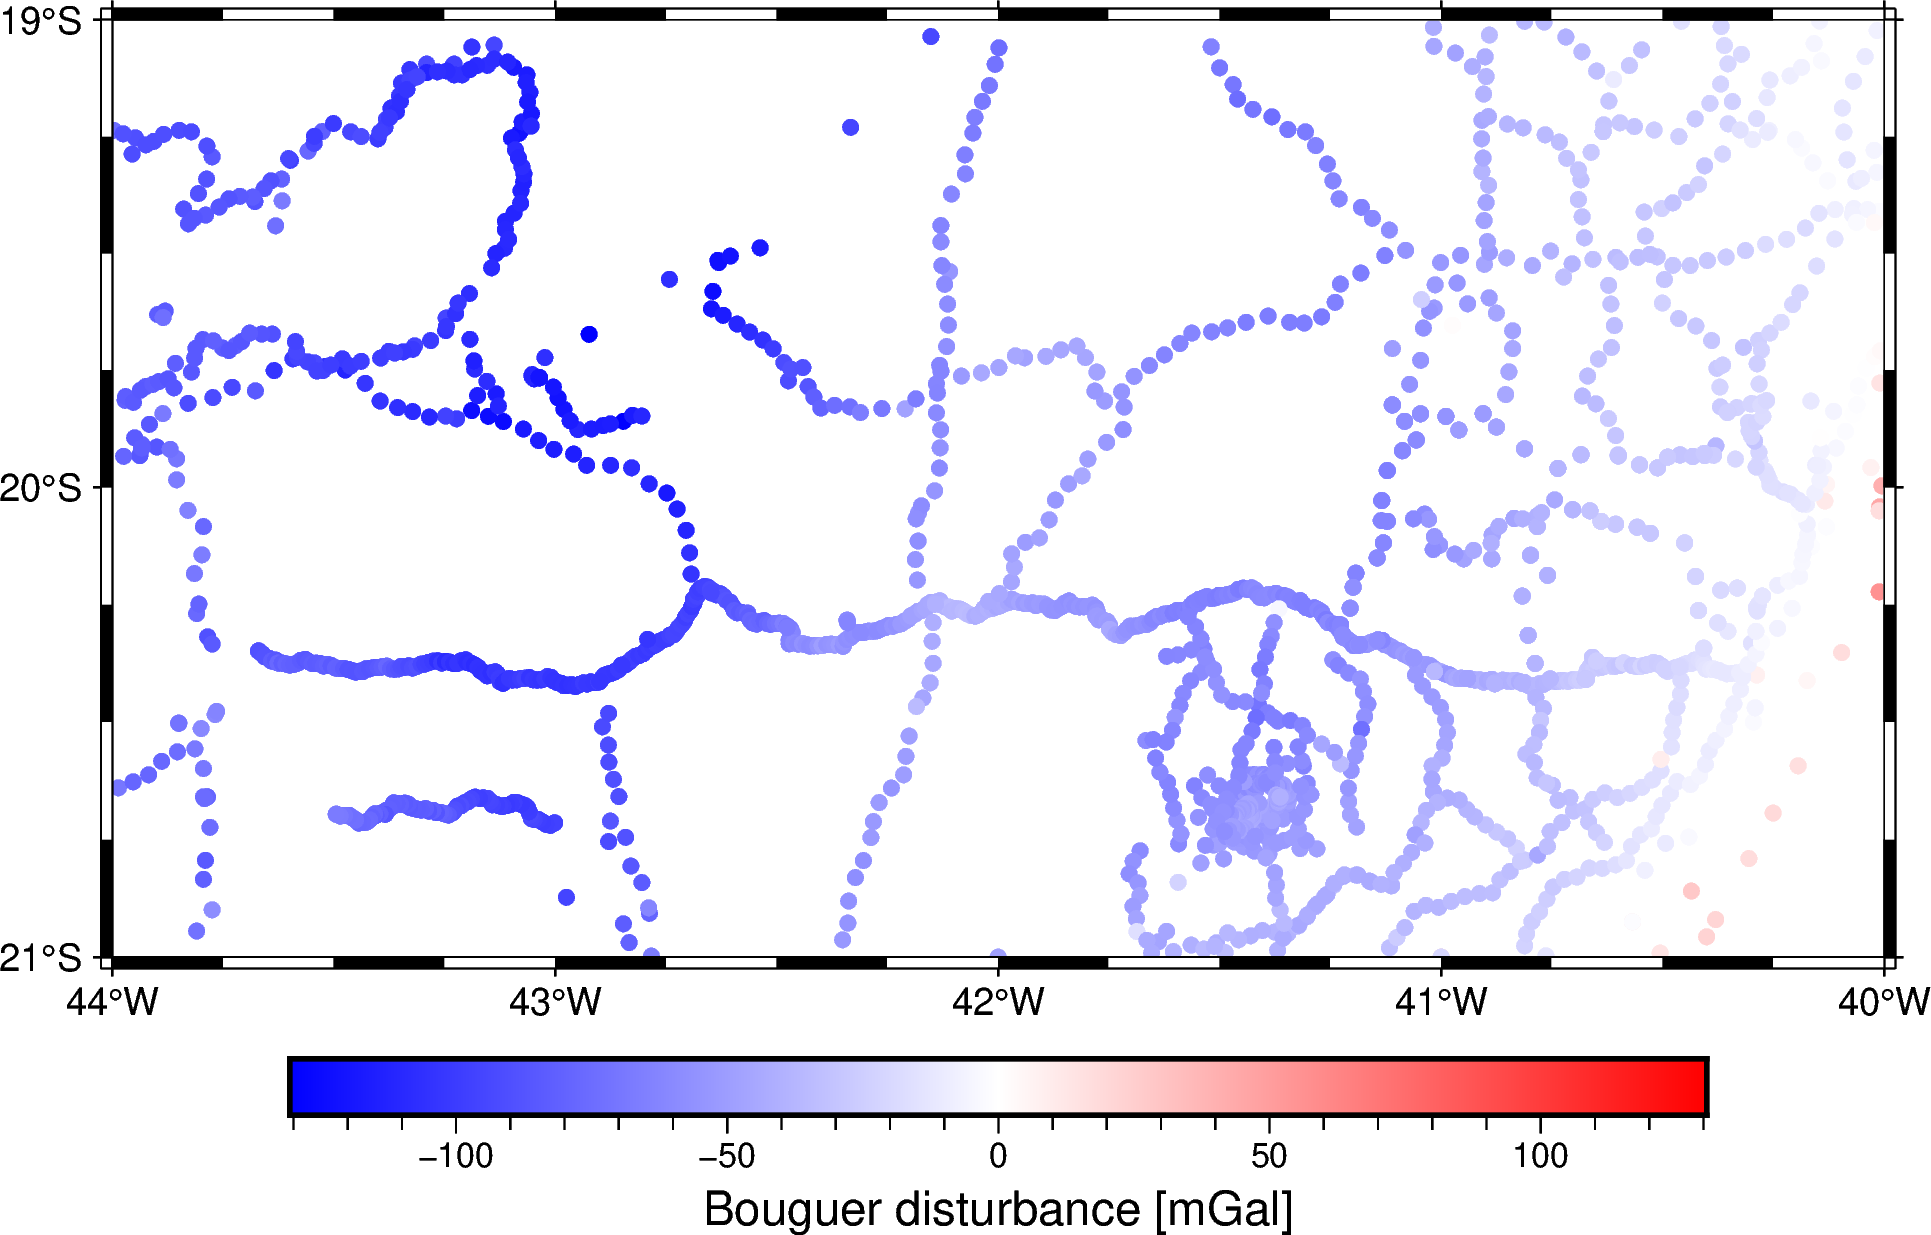

In [92]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

## Separação regional residual

In [93]:
regional = vd.Trend(degree=3).fit(coordinates, data.gravity_bouguer_mgal)
data = data.assign(
    regional_mgal=regional.predict(coordinates),
)
data = data.assign(
    residual_mgal=data.gravity_bouguer_mgal - data.regional_mgal,
)
data

/home/gelson/anaconda3/envs/fatiando/lib/python3.10/site-packages/verde/base/least_squares.py:68: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  regr.fit(jacobian, data.ravel(), sample_weight=weights)


,Station,Reading,Time,Date,height_sea_level_m,X,Y,longitude,latitude,gravity_mgal,...,Source,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,easting_m,northing_m,gravity_bouguer_mgal,regional_mgal,residual_mgal
0,1,2239.39,14:28:00,2019/12/03,147.94,238246.104213,7.702141e+06,-41.514018,-20.762135,978591.406605,...,03122019_996,-5.800000,142.140000,978637.817634,-46.411029,-4.337893e+06,-2.204371e+06,-52.725722,-50.891251,-1.834471
1,2,2239.41,15:12:00,2019/12/03,152.06,239573.565307,7.702483e+06,-41.501226,-20.759230,978591.445776,...,03122019_996,-5.800000,146.260000,978636.372087,-44.926310,-4.336557e+06,-2.204048e+06,-48.682833,-50.558469,1.875637
2,3,2246.38,16:06:00,2019/12/03,117.30,241216.748955,7.704176e+06,-41.485206,-20.744179,978598.473518,...,03122019_996,-5.600000,111.700000,978646.141191,-47.667672,-4.334883e+06,-2.202376e+06,-56.054468,-50.393654,-5.660814
3,4,2245.71,16:46:00,2019/12/03,129.10,243071.287960,7.702906e+06,-41.467595,-20.755897,978597.809879,...,03122019_996,-5.800000,123.300000,978643.260610,-45.450731,-4.333043e+06,-2.203678e+06,-50.389693,-49.579900,-0.809793
4,5,2249.62,17:13:00,2019/12/03,130.01,245332.547009,7.701803e+06,-41.446052,-20.766168,978601.745635,...,03122019_996,-5.800000,124.210000,978643.593922,-41.848287,-4.330792e+06,-2.204819e+06,-50.678791,-48.665690,-2.013100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,na,NaN,NaN,NaN,564.53,NaN,NaN,-42.966400,-19.858900,978399.530000,...,UFOP,-9.000000,555.530000,978457.167166,-57.637166,-4.489656e+06,-2.104324e+06,-116.114361,-91.175908,-24.938453
3311,na,NaN,NaN,NaN,561.50,NaN,NaN,-42.993600,-19.810300,978392.810000,...,UFOP,-9.000000,552.500000,978455.303743,-62.493743,-4.492498e+06,-2.098958e+06,-121.307053,-91.800575,-29.506478
3314,na,NaN,NaN,NaN,581.22,NaN,NaN,-43.054700,-19.228100,978369.810000,...,UFOP,-10.400001,570.819999,978416.571994,-46.761994,-4.498883e+06,-2.034797e+06,-109.585859,-100.374968,-9.210892
3315,na,NaN,NaN,NaN,529.92,NaN,NaN,-43.036900,-19.765800,978398.220000,...,UFOP,-9.000000,520.920000,978462.493467,-64.273467,-4.497023e+06,-2.094045e+06,-120.581977,-92.501953,-28.080025


/tmp/ipykernel_45307/1801782014.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


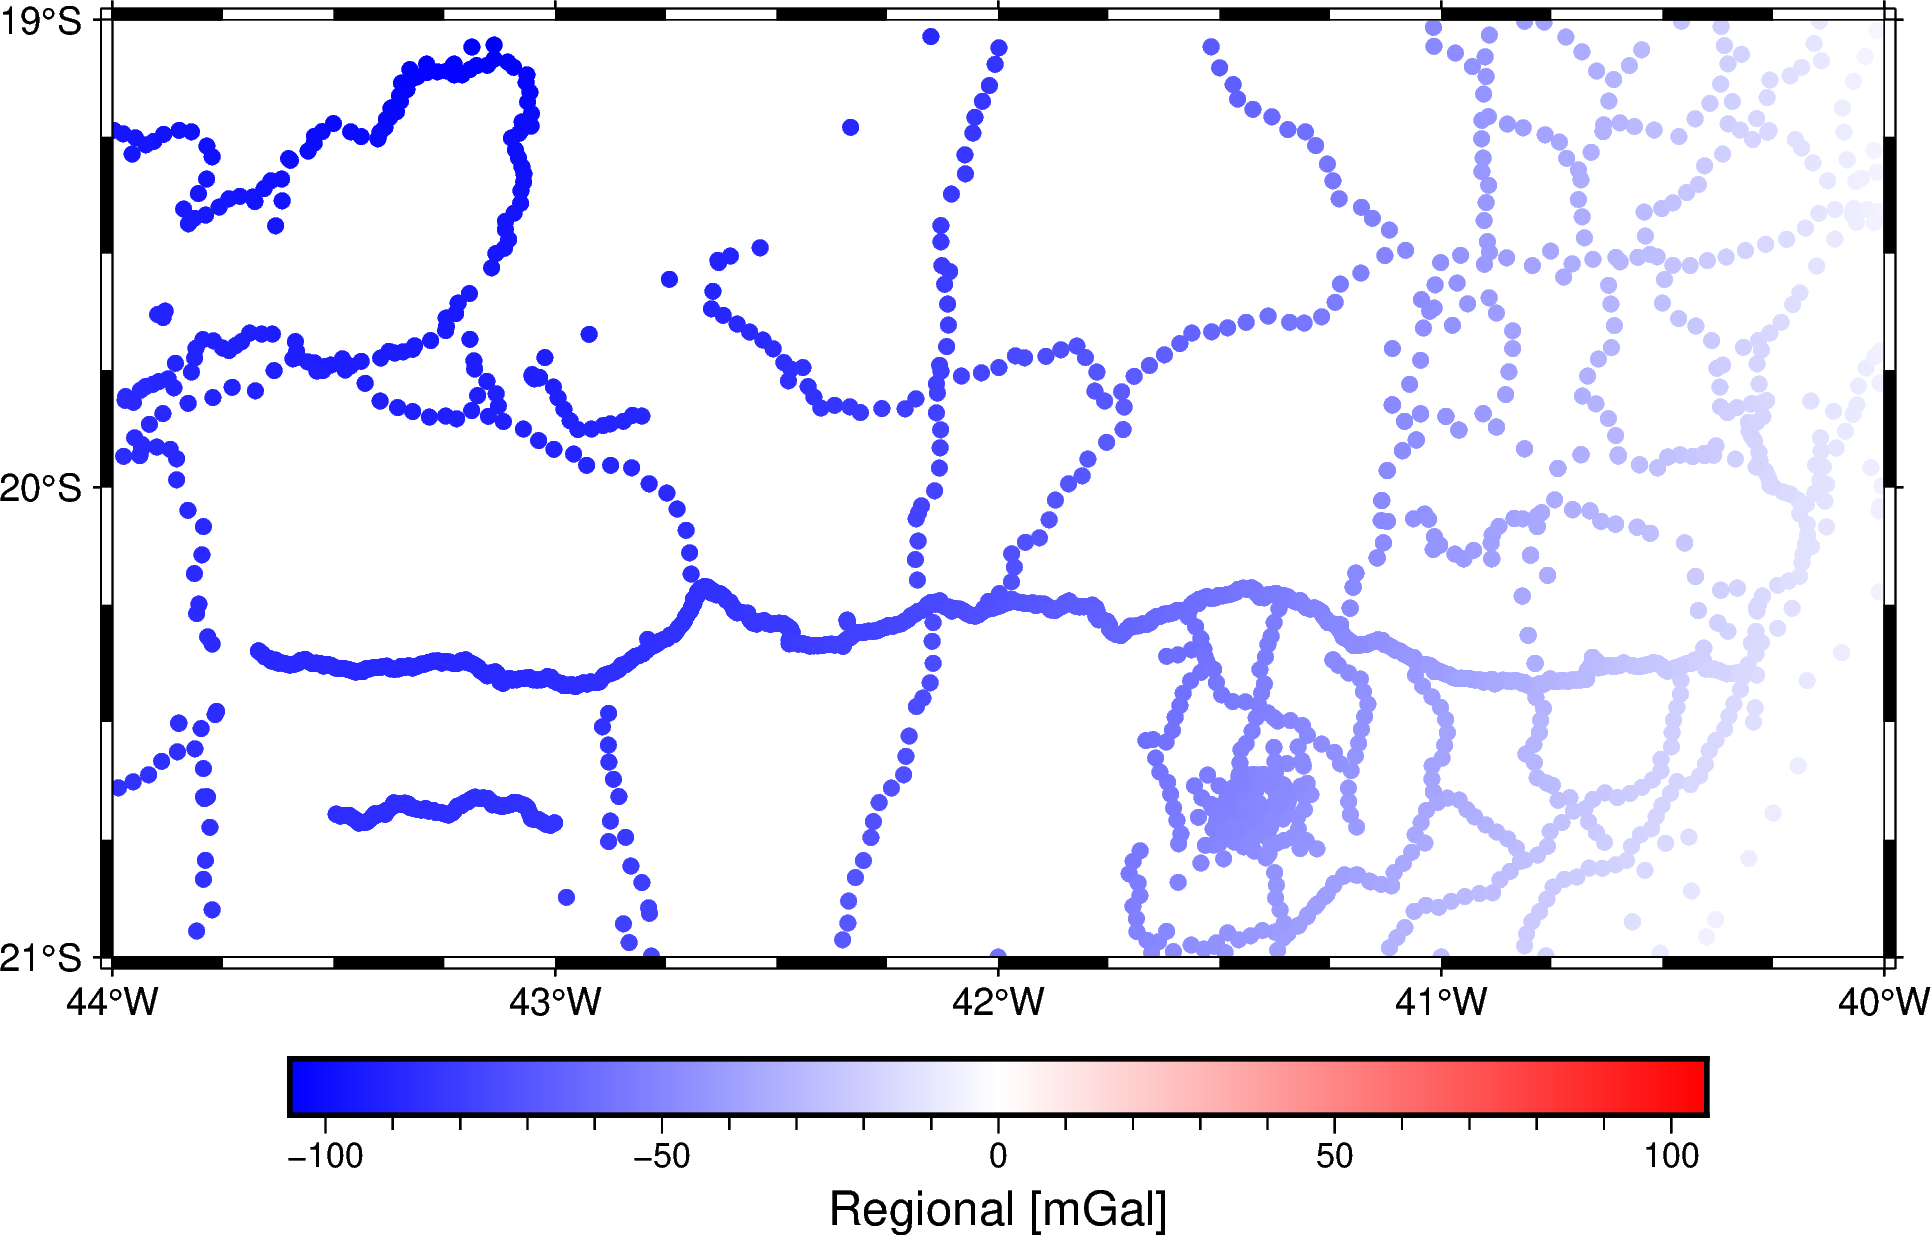

In [94]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.regional_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.regional_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Regional [mGal]"')
fig.show()

/tmp/ipykernel_45307/3244326769.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


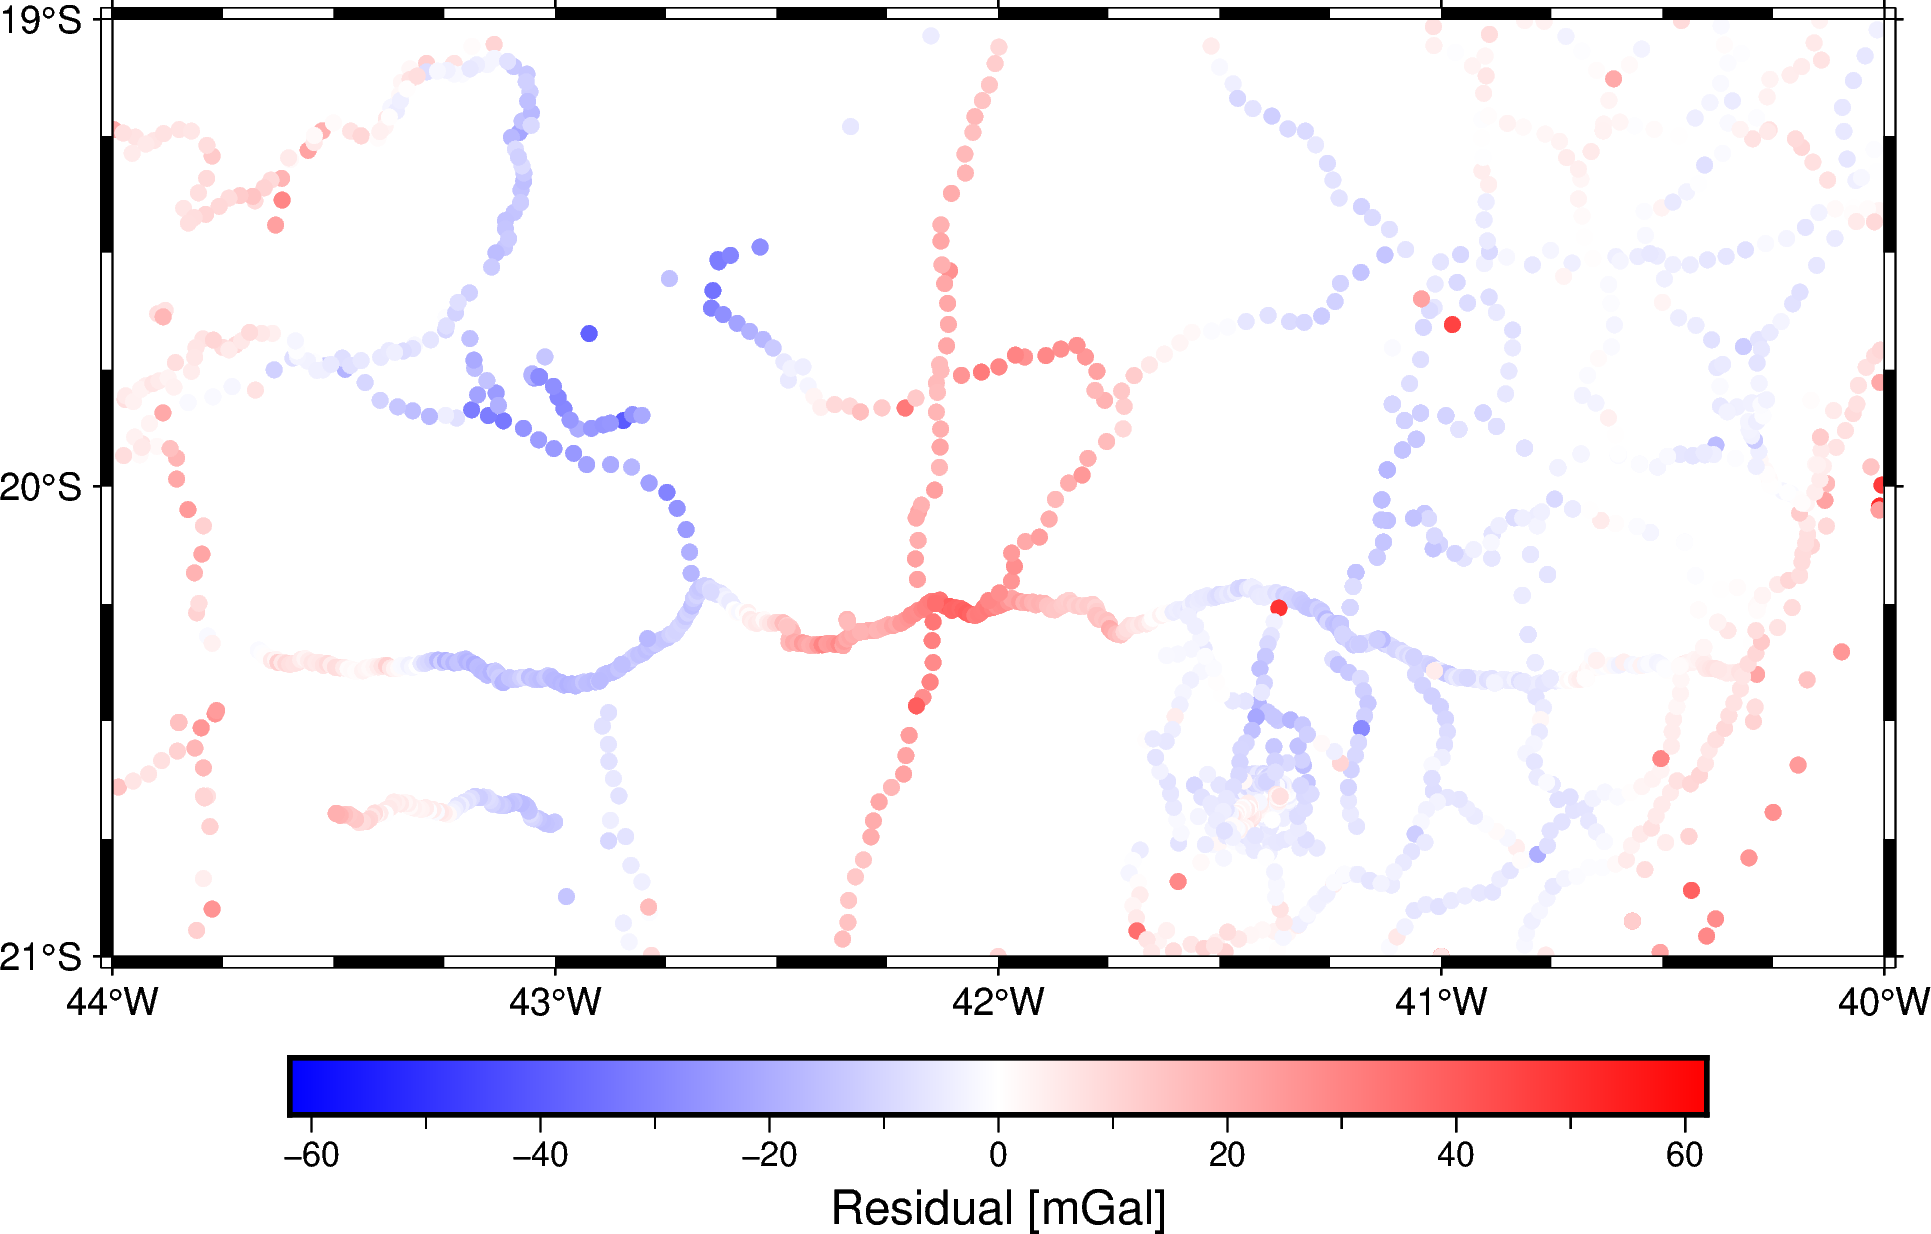

In [95]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.residual_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.residual_mgal,
    cmap=True,
    style="c4p",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"Residual [mGal]"')
fig.show()

## Interpolação com fontes equivalentes

In [ ]:
eqs = hm.EquivalentSources(damping=10, depth=10e3)
eqs.fit((data.easting_m, data.northing_m, data.height_geometric_m), data.residual_mgal)

In [ ]:
residual_grid = eqs.grid(
    coordinates=vd.grid_coordinates(region, spacing=2 / 60, extra_coords=2.2e3),
    data_names="gravity_residual",
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

In [ ]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

![](https://www.fatiando.org/tutorials/_images/bushveld_igneous_complex_geology.jpg)